In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df_all_random = pd.read_csv("../data/BBC_News_Summary/Merged_df/merged_df.csv")

In [3]:
columns = df_all_random.columns

for column in columns:
    print(column)

Text
Category


In [4]:
df_all_random['Text'].fillna('', inplace=True)

# Verteilung der Kategorien

Index(['business', 'entertainment', 'politics', 'sport', 'tech'], dtype='object', name='Category')


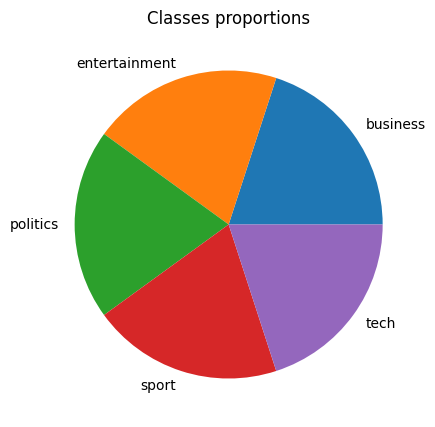

In [5]:
label_count = df_all_random['Category'].value_counts()

print(label_count.index)

plt.figure(figsize=(5,5))
plt.pie(label_count.values, labels=label_count.index)
plt.title('Classes proportions')
plt.show()

# Modelltraining: SVM

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_all_random['Text'], df_all_random['Category'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

svm = SVC()
svm.fit(X_train_vectorized, y_train)

y_pred = svm.predict(X_test_vectorized)

print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

     business       0.99      0.99      0.99        80
entertainment       0.99      1.00      0.99        82
     politics       1.00      0.98      0.99        57
        sport       1.00      1.00      1.00        80
         tech       0.99      0.99      0.99        87

     accuracy                           0.99       386
    macro avg       0.99      0.99      0.99       386
 weighted avg       0.99      0.99      0.99       386



# Modelltraining: K-Nearest Neighbor

In [8]:
labels = df_all_random['Category']

X_train, X_test, y_train, y_test = train_test_split(df_all_random['Text'], labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


k = 5 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_tfidf, y_train)

y_pred = knn_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

     business       0.96      0.91      0.94        80
entertainment       0.99      0.94      0.96        82
     politics       0.86      0.95      0.90        57
        sport       0.95      0.99      0.97        80
         tech       0.95      0.94      0.95        87

     accuracy                           0.95       386
    macro avg       0.94      0.95      0.94       386
 weighted avg       0.95      0.95      0.95       386



# Modelltraining: Naive Bayes

In [10]:
labels = df_all_random['Category']

X_train, X_test, y_train, y_test = train_test_split(df_all_random['Text'], labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

y_pred = naive_bayes_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

     business       1.00      0.89      0.94        80
entertainment       1.00      0.90      0.95        82
     politics       0.77      0.98      0.86        57
        sport       1.00      0.99      0.99        80
         tech       0.96      0.98      0.97        87

     accuracy                           0.95       386
    macro avg       0.94      0.95      0.94       386
 weighted avg       0.96      0.95      0.95       386

